<a href="https://colab.research.google.com/github/06ksha/Concepts-and-Technology-of-AI/blob/main/Workshop_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


In [2]:
import numpy as np

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, \
        "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, \
        "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, \
        "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), \
        "Test failed for numpy array input"

    print("All tests passed!")


# Run the test case
test_logistic_function()


All tests passed!


In [3]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y = {0 or 1}
    and predicted target value y_pred in {0,1}.

    Arguments:
    y_true (scalar): true target value {0 or 1}
    y_pred (scalar): predicted target value {0-1}
    Returns:
    loss (float): loss/error value
    """
    import numpy as np

    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss


In [4]:
# Test function:
y_true, y_pred = 0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

print("+++++++++++++--------------------------++++++++++++++++++++++++")

y_true, y_pred = 1, 0.9
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")


log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [5]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Completely wrong prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    loss = log_loss(y_true, y_pred)
    assert loss > 10, "Test failed for wrong prediction (y_true=1, y_pred=0)"

    # Test case 4: Completely wrong prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    loss = log_loss(y_true, y_pred)
    assert loss > 10, "Test failed for wrong prediction (y_true=0, y_pred=1)"

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(1 * np.log(0.8))
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")


In [6]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np

    assert len(y_true) == len(y_pred), \
        "Length of true values and length of predicted values do not match"

    # Number of samples
    n = len(y_true)

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Vector of log losses
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Average cost
    cost = np.sum(loss_vec) / n

    return cost


In [7]:
import numpy as np

def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Manually calculate expected cost
    expected_cost = (
        - (1 * np.log(0.9) + (1 - 1) * np.log(1 - 0.9)) +
        - (0 * np.log(0.1) + (1 - 0) * np.log(1 - 0.1)) +
        - (1 * np.log(0.8) + (1 - 1) * np.log(1 - 0.8))
    ) / 3

    # Call the cost_function to get the result
    result = cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

# Run the test case
test_cost_function()


Test passed for simple case!


In [8]:
import numpy as np

def logistic_function(x):
    """Compute the sigmoid/logistic function."""
    return 1 / (1 + np.exp(-x))

def cost_function(y_true, y_pred):
    """Compute average log loss."""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.mean(loss_vec)
    return cost

def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.

    Args:
    X (ndarray, shape (m,n)): data on features, m observations with n features.
    y (array_like, shape (m,)): true target values (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.

    Returns:
    cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute linear combination z = X·w + b
    z = np.dot(X, w) + b

    # Compute predictions using sigmoid
    y_pred = logistic_function(z)

    # Compute the cost using average log loss
    cost = cost_function(y, y_pred)

    return cost


In [9]:
import numpy as np

def logistic_function(x):
    """Compute the sigmoid/logistic function."""
    return 1 / (1 + np.exp(-x))

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:
    X (ndarray, shape (n,d)): Input data, n observations with d features
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model

    Returns:
    grad_w (array_like, shape (d,)): Gradients of the cost function w.r.t. weights
    grad_b (float): Gradient of the cost function w.r.t. bias
    """
    n, d = X.shape  # number of samples and features
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute linear combination z = X·w + b
    z = np.dot(X, w) + b

    # Compute predictions using sigmoid
    y_pred = logistic_function(z)

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # shape (d,)
    grad_b = np.sum(y_pred - y) / n         # scalar

    return grad_w, grad_b


In [10]:
import numpy as np

# Simple test case
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])                 # shape (2,)
w = np.array([0.5, 1.5])             # shape (2,)
b = 1                                 # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [11]:
import numpy as np

def logistic_function(x):
    """Compute sigmoid/logistic function."""
    return 1 / (1 + np.exp(-x))

def cost_function(y_true, y_pred):
    """Compute average log loss."""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.mean(loss_vec)
    return cost

def compute_gradient(X, y, w, b):
    """Compute gradients of cost function w.r.t weights and bias."""
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y) / n
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        z = np.dot(X, w) + b
        y_pred = logistic_function(z)
        cost = cost_function(y, y_pred)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [12]:
import numpy as np

def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
    y = np.array([1, 0])                     # Shape (2,)
    w = np.zeros(X.shape[1])                 # Shape (2,)
    b = 0.0                                  # Scalar
    alpha = 0.1                              # Learning rate
    n_iter = 100                             # Number of iterations

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

# Run the test
test_gradient_descent()


All tests passed!


Iteration 0: w = [0.005  0.0025], b = 0.000000
Iteration 99: w = [0.49236201 0.24271295], b = -0.023120


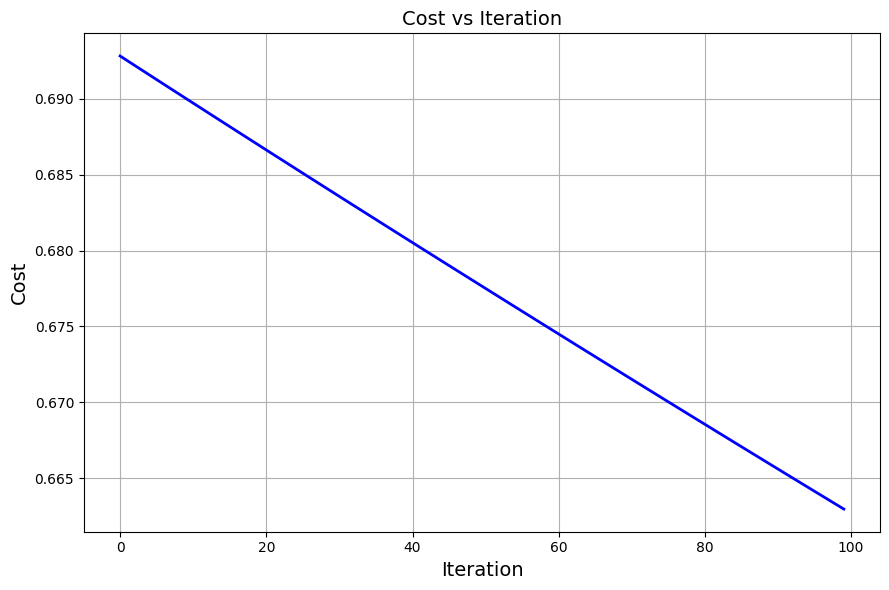

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple dataset
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 100

# Run gradient descent to generate cost_history
w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter)

# Plot cost vs iteration
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import numpy as np

def logistic_function(x):
    """Compute the sigmoid/logistic function."""
    return 1 / (1 + np.exp(-x))

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Args:
    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


In [17]:
import numpy as np

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])  # Shape (3, 2)
    w_test = np.array([1.0, -1.0])                              # Shape (2,)
    b_test = 0.0                                                 # Scalar bias
    threshold = 0.5                                              # Default threshold

    # Updated expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

# Run the test
test_prediction()


Test passed!


In [18]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Args:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).

    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    # True Positives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    # True Negatives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    # False Positives
    FP = np.sum((y_true == 0) & (y_pred == 1))
    # False Negatives
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dataset URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Column names (use standard single quotes)
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Load dataset
data_pima_diabetes = pd.read_csv(url, names=columns)

# Display first 5 rows
print(data_pima_diabetes.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
import numpy as np
import pandas as pd

# Columns to clean
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN for the selected columns
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)

# Fill NaN values with the median of each column
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)

# Check dataset info
data_pima_diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values

# Train-test split (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


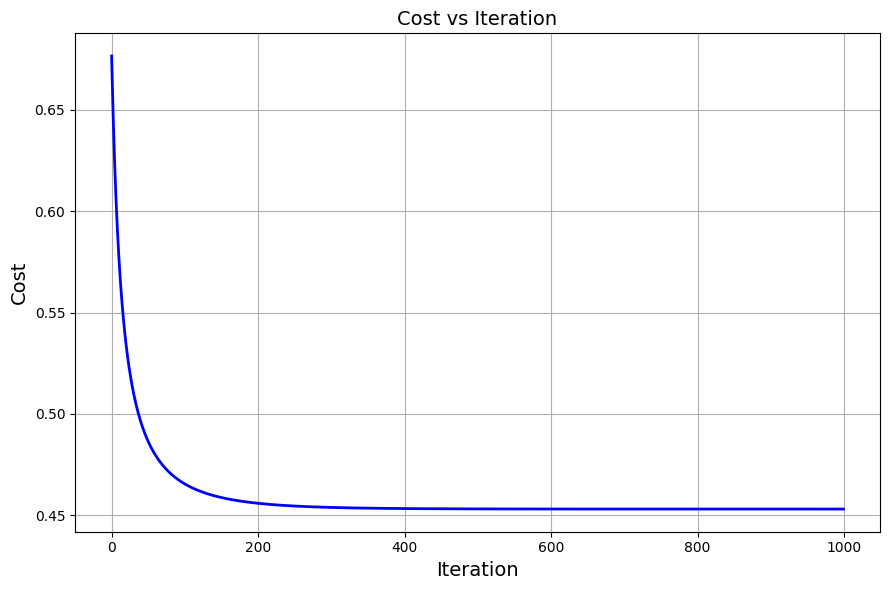

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])  # weights
b = 0.0                                # bias
alpha = 0.1                             # learning rate
n_iter = 1000                           # number of iterations

# Train model using your gradient_descent function
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter,
    show_cost=True, show_params=False
)

# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Predict on train and test sets
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

# Compute cost (log loss) for train and test sets
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

# Print results
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")



Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


In [26]:
# Evaluate performance on train set
train_metrics = evaluate_classification(y_train, y_train_pred)
print("\nTrain Metrics:")
print("Confusion Matrix:\n", train_metrics["confusion_matrix"])
print(f"Precision: {train_metrics['precision']:.3f}")
print(f"Recall: {train_metrics['recall']:.3f}")
print(f"F1-score: {train_metrics['f1_score']:.3f}")

# Evaluate performance on test set
test_metrics = evaluate_classification(y_test, y_test_pred)
print("\nTest Metrics:")
print("Confusion Matrix:\n", test_metrics["confusion_matrix"])
print(f"Precision: {test_metrics['precision']:.3f}")
print(f"Recall: {test_metrics['recall']:.3f}")
print(f"F1-score: {test_metrics['f1_score']:.3f}")



Train Metrics:
Confusion Matrix:
 [[362  38]
 [ 87 127]]
Precision: 0.770
Recall: 0.593
F1-score: 0.670

Test Metrics:
Confusion Matrix:
 [[82 18]
 [27 27]]
Precision: 0.600
Recall: 0.500
F1-score: 0.545
